<a href="https://colab.research.google.com/github/lilyzhizhou/datathon-3/blob/main/Logistic_Regression_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Import libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import plotly.express as px
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, auc, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import Pre-Diabetes Data
datapd = pd.read_csv('/content/drive/MyDrive/Machine Learning /Datathon #3/datapd.csv')

# Drop Patient_ID
datapd.drop('Patient_ID', axis = 1, inplace = True)

print(datapd.shape)
datapd.head()

(6414, 12)


,Unnamed: 0,predm,Age_at_Exam,BMI,Total_Cholesterol,Depression,HTN,OA,COPD,corstrd_bin,htnmed_bin,Sex
0,2,1,63,30.9,NaN,0,1,0,1,0,1,1
1,2386,1,66,23.6,3.54,1,1,1,0,0,1,1
2,7781,0,68,34.3,5.55,1,1,1,0,0,1,0
3,7644,1,73,28.5,3.78,1,1,0,1,1,1,0
4,2290,0,53,33.4,5.38,0,1,1,0,1,1,0


In [5]:
# Fill missing values for total cholesterol with median
datapd.fillna(datapd.median(), inplace=True)
# median works well with skewed continuous data and is less sensitive to outliers and overfitting
print(datapd.isnull().sum())

Unnamed: 0           0
predm                0
Age_at_Exam          0
BMI                  0
Total_Cholesterol    0
Depression           0
HTN                  0
OA                   0
COPD                 0
corstrd_bin          0
htnmed_bin           0
Sex                  0
dtype: int64


median is less sensitive to outliers compared to the mean and can help preserve the overall distribution of the data.

In [17]:
# Split the data into features and target variable
X = datapd.drop('predm', axis=1)
y = datapd['predm']

# Split the data into trainingsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# L2 regularization used as it will spread coefficient values more evenly
# across all predictors

LogisticRegression(solver='liblinear')

In [19]:
# Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

In [23]:
# Use the model to make predictions on the testing and training data
y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

# Evaluate the model
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

======== Training Set ==========
AUC :  0.6999745316495879
Accuracy :  0.7064449064449064
Confusion Matrix:
[[2383  941]
 [ 471 1015]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      3324
           1       0.52      0.68      0.59      1486

    accuracy                           0.71      4810
   macro avg       0.68      0.70      0.68      4810
weighted avg       0.74      0.71      0.72      4810

======== Test Set ==========
AUC :  0.7014123665480427
Accuracy :  0.7044887780548629
Confusion Matrix:
[[797 327]
 [147 333]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1124
           1       0.50      0.69      0.58       480

    accuracy                           0.70      1604
   macro avg       0.67      0.70      0.68      1604
weighted avg       0.74      0.70      0.71      1604



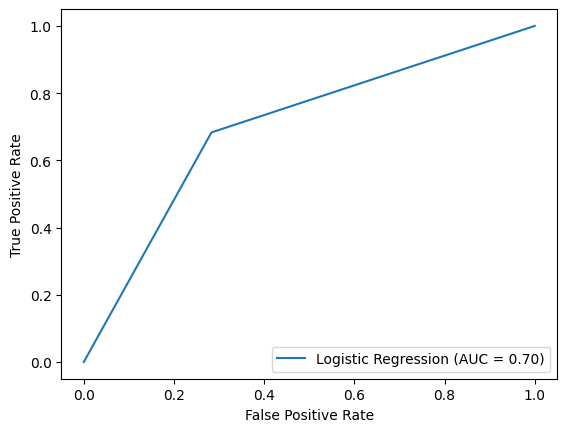

In [27]:
# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

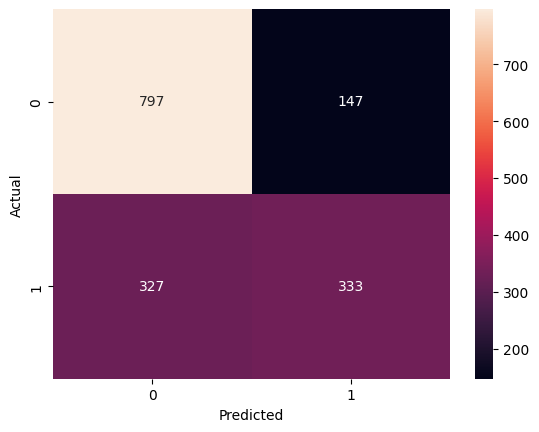

In [16]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [17]:
# Separate features and target variable
X = datapd.drop('predm', axis=1)
y = datapd['predm']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.582772
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  predm   No. Observations:                 6414
Model:                          Logit   Df Residuals:                     6402
Method:                           MLE   Df Model:                           11
Date:                Wed, 25 Oct 2023   Pseudo R-squ.:                  0.1380
Time:                        22:00:34   Log-Likelihood:                -3737.9
converged:                       True   LL-Null:                       -4336.3
Covariance Type:            nonrobust   LLR p-value:                7.840e-250
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4014      0.276    -15.919      0.000      -4.943      -3.859
Unnamed: